#  Netflix Content Recommendation Engine

A clean and easy-to-understand recommendation system for Netflix content.

## What we'll build:
1. **Data Analysis** - Understand the Netflix dataset
2. **Visualizations** - Beautiful charts with matplotlib and seaborn
3. **Recommendation Engine** - Simple content-based recommendations
4. **Easy Interface** - Get recommendations with just a movie/show name

---

## 1. Import Libraries

Let's start with the essential libraries we need:

In [2]:
# Data handling
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing for recommendations
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("📚 All libraries loaded successfully!")
print("🎬 Ready to build our Netflix recommendation engine!")

📚 All libraries loaded successfully!
🎬 Ready to build our Netflix recommendation engine!


## 2. Load and Explore the Data

Let's load our Netflix dataset and see what we're working with:

In [3]:
# Load the Netflix dataset
df = pd.read_csv('Netflix Dataset.csv')

print(f"📊 Dataset loaded with {df.shape[0]:,} movies and TV shows")
print(f"📋 Columns: {df.shape[1]}")
print("\n" + "="*50)

# Show first few rows
print("\n🔍 First 3 rows:")
df.head(3)

📊 Dataset loaded with 7,789 movies and TV shows
📋 Columns: 11


🔍 First 3 rows:


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [4]:
# Basic information about the dataset
print("📋 Dataset Information:")
print("="*30)
print(f"Total entries: {len(df):,}")
print(f"Movies: {len(df[df['Category'] == 'Movie']):,}")
print(f"TV Shows: {len(df[df['Category'] == 'TV Show']):,}")

print("\n🔍 Missing values:")
missing = df.isnull().sum()
for col, miss in missing.items():
    if miss > 0:
        print(f"{col}: {miss} ({miss/len(df)*100:.1f}%)")

print("\n📊 Dataset columns:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

📋 Dataset Information:
Total entries: 7,789
Movies: 5,379
TV Shows: 2,410

🔍 Missing values:
Director: 2388 (30.7%)
Cast: 718 (9.2%)
Country: 507 (6.5%)
Release_Date: 10 (0.1%)
Rating: 7 (0.1%)

📊 Dataset columns:
 1. Show_Id
 2. Category
 3. Title
 4. Director
 5. Cast
 6. Country
 7. Release_Date
 8. Rating
 9. Duration
10. Type
11. Description


## 3. Clean the Data

Let's clean up the data to make it ready for analysis:

In [5]:
# Clean the data
netflix = df.copy()

# Fill missing values with meaningful defaults
netflix['Director'] = netflix['Director'].fillna('Unknown Director')
netflix['Cast'] = netflix['Cast'].fillna('Unknown Cast')
netflix['Country'] = netflix['Country'].fillna('Unknown Country')
netflix['Description'] = netflix['Description'].fillna('No description available')

# Create a combined text column for recommendations
netflix['Combined_Features'] = (
    netflix['Type'].fillna('') + ' ' + 
    netflix['Description'].fillna('') + ' ' +
    netflix['Director'].fillna('') + ' ' +
    netflix['Cast'].fillna('')
)

print("✅ Data cleaning completed!")
print(f"📊 Clean dataset shape: {netflix.shape}")
print(f"📝 Combined features created for {len(netflix)} items")

✅ Data cleaning completed!
📊 Clean dataset shape: (7789, 12)
📝 Combined features created for 7789 items


## 4. Data Visualization

Let's create some beautiful visualizations to understand our Netflix data:

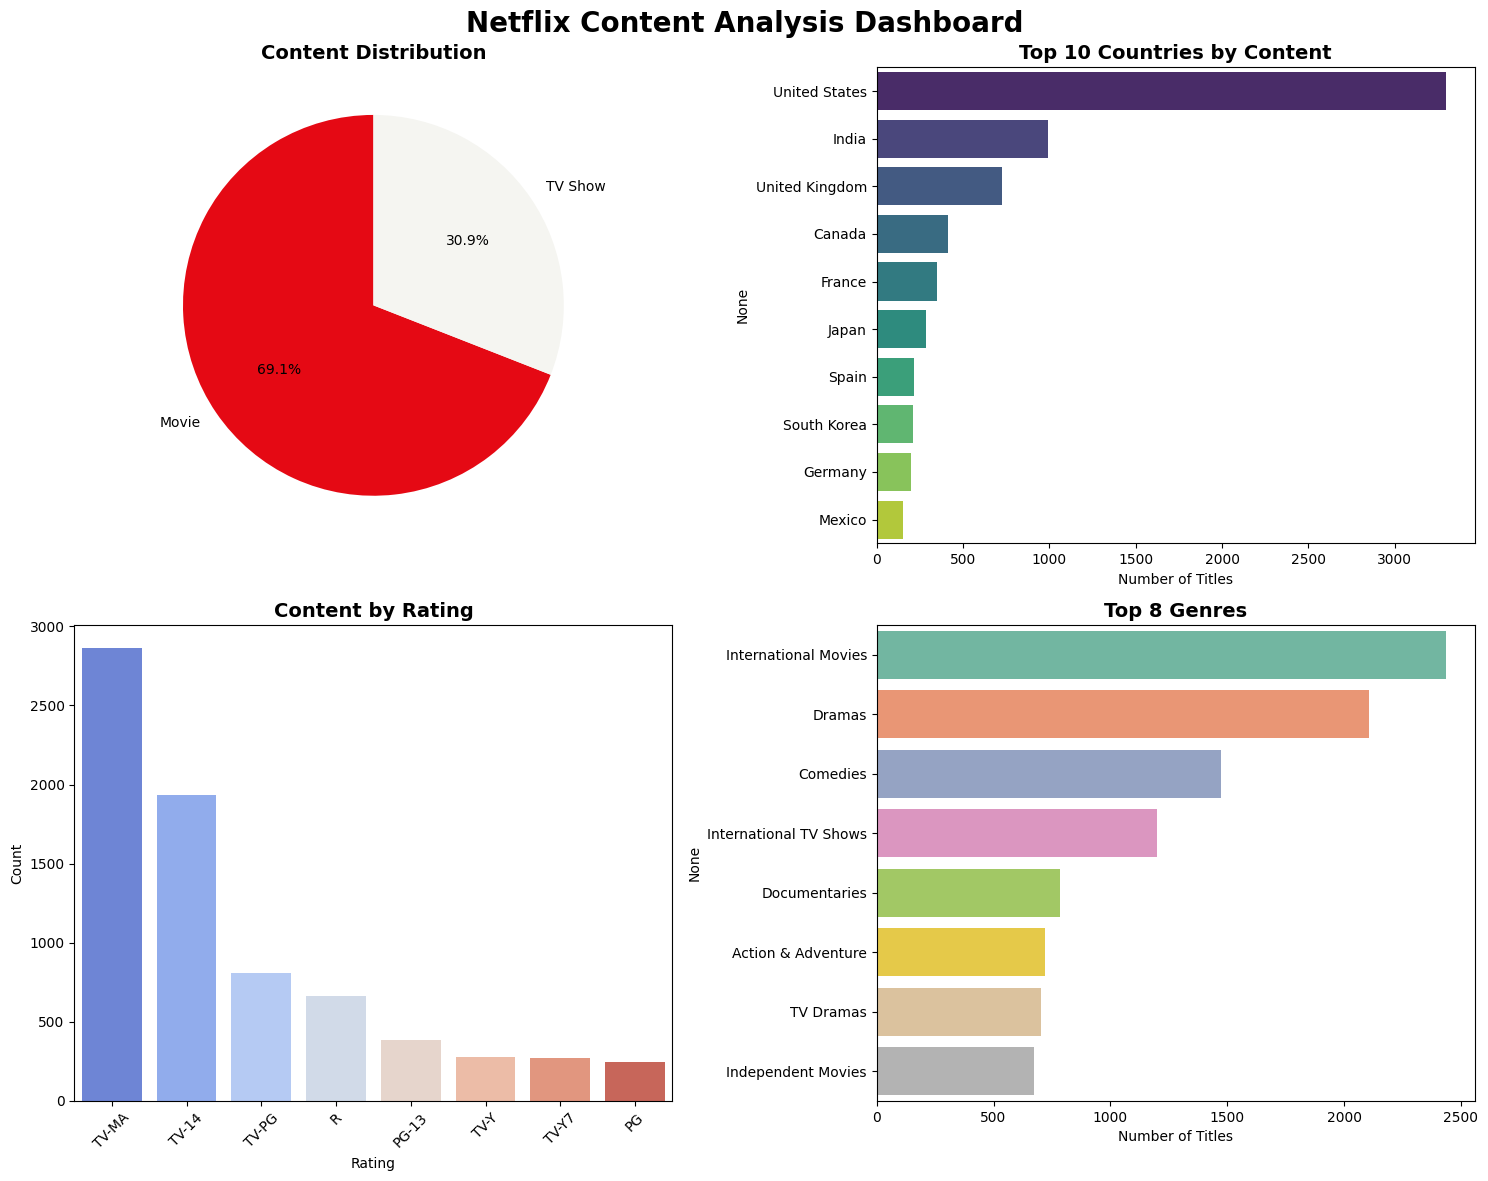

🎯 Key Insights:
• 5,379 movies vs 2,410 tv shows
• Top producing country: United States with 3298 titles
• Most common rating: TV-MA (2865 titles)
• Most popular genre: International Movies (2437 titles)


In [6]:
# Set up the figure
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Netflix Content Analysis Dashboard', fontsize=20, fontweight='bold')

# 1. Movies vs TV Shows
content_counts = netflix['Category'].value_counts()
colors = ['#E50914', '#F5F5F1']  # Netflix colors

axes[0,0].pie(content_counts.values, labels=content_counts.index, autopct='%1.1f%%', 
              colors=colors, startangle=90)
axes[0,0].set_title('Content Distribution', fontsize=14, fontweight='bold')

# 2. Top 10 Countries
# Split countries and count (some shows have multiple countries)
all_countries = []
for countries in netflix['Country'].dropna():
    if countries != 'Unknown Country':
        country_list = [c.strip() for c in str(countries).split(',')]
        all_countries.extend(country_list)

top_countries = pd.Series(all_countries).value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, ax=axes[0,1], palette='viridis')
axes[0,1].set_title('Top 10 Countries by Content', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Number of Titles')

# 3. Top Ratings
rating_counts = netflix['Rating'].value_counts().head(8)
sns.barplot(x=rating_counts.index, y=rating_counts.values, ax=axes[1,0], palette='coolwarm')
axes[1,0].set_title('Content by Rating', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Rating')
axes[1,0].set_ylabel('Count')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Top Genres
# Split genres and count
all_genres = []
for genres in netflix['Type'].dropna():
    genre_list = [g.strip() for g in str(genres).split(',')]
    all_genres.extend(genre_list)

top_genres = pd.Series(all_genres).value_counts().head(8)
sns.barplot(x=top_genres.values, y=top_genres.index, ax=axes[1,1], palette='Set2')
axes[1,1].set_title('Top 8 Genres', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Number of Titles')

plt.tight_layout()
plt.show()

# Print some insights
print("🎯 Key Insights:")
print(f"• {content_counts.iloc[0]:,} {content_counts.index[0].lower()}s vs {content_counts.iloc[1]:,} {content_counts.index[1].lower()}s")
print(f"• Top producing country: {top_countries.index[0]} with {top_countries.iloc[0]} titles")
print(f"• Most common rating: {rating_counts.index[0]} ({rating_counts.iloc[0]} titles)")
print(f"• Most popular genre: {top_genres.index[0]} ({top_genres.iloc[0]} titles)")

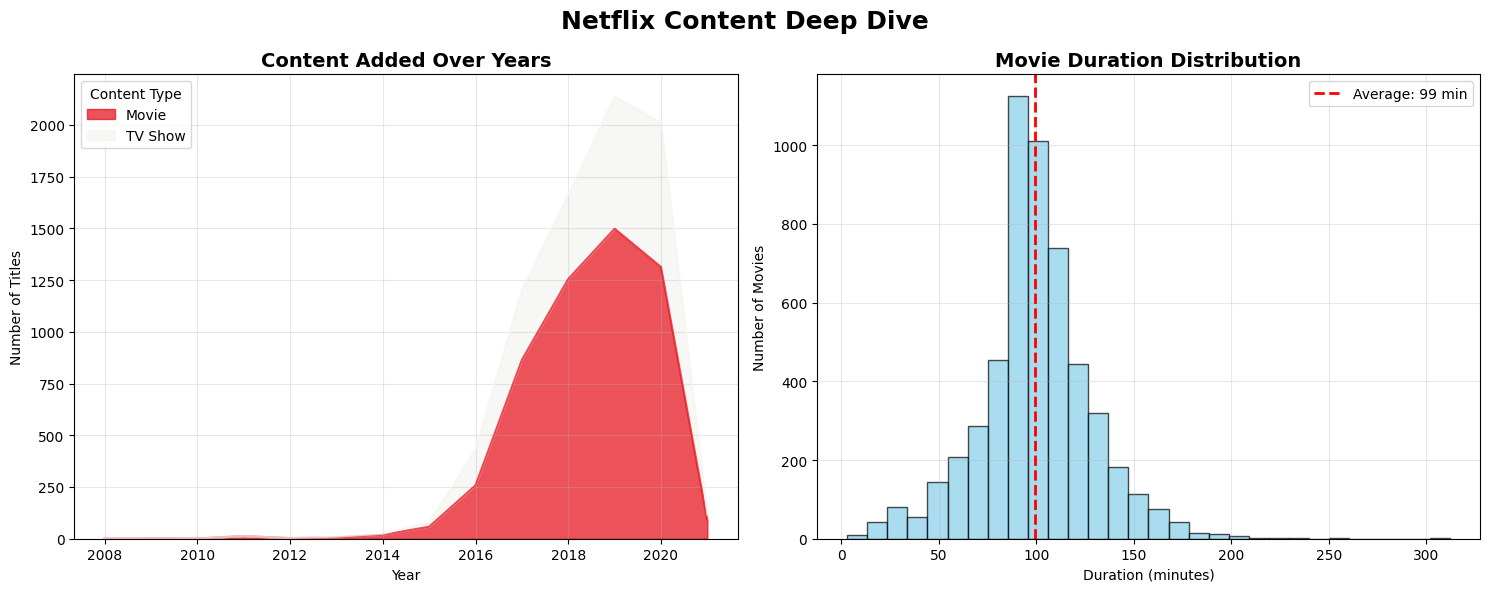

In [7]:
# Additional visualizations
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Netflix Content Deep Dive', fontsize=18, fontweight='bold')

# 1. Release Year Trends (if available)
netflix['Release_Year'] = pd.to_datetime(netflix['Release_Date'], errors='coerce').dt.year
yearly_data = netflix.dropna(subset=['Release_Year'])

if not yearly_data.empty:
    yearly_counts = yearly_data.groupby(['Release_Year', 'Category']).size().unstack(fill_value=0)
    yearly_counts = yearly_counts[yearly_counts.index >= 2000]  # Focus on recent years
    
    yearly_counts.plot(kind='area', ax=axes[0], alpha=0.7, color=['#E50914', '#F5F5F1'])
    axes[0].set_title('Content Added Over Years', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Number of Titles')
    axes[0].legend(title='Content Type')
    axes[0].grid(True, alpha=0.3)
else:
    axes[0].text(0.5, 0.5, 'Release year data not available', 
                ha='center', va='center', transform=axes[0].transAxes, fontsize=12)
    axes[0].set_title('Release Year Analysis', fontsize=14, fontweight='bold')

# 2. Content Length Analysis (for movies)
movies_data = netflix[netflix['Category'] == 'Movie'].copy()
# Extract duration in minutes
movies_data['Duration_Minutes'] = movies_data['Duration'].str.extract(r'(\d+)').astype(float)
duration_data = movies_data['Duration_Minutes'].dropna()

if not duration_data.empty:
    axes[1].hist(duration_data, bins=30, color='skyblue', alpha=0.7, edgecolor='black')
    axes[1].axvline(duration_data.mean(), color='red', linestyle='--', linewidth=2,
                   label=f'Average: {duration_data.mean():.0f} min')
    axes[1].set_title('Movie Duration Distribution', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Duration (minutes)')
    axes[1].set_ylabel('Number of Movies')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
else:
    axes[1].text(0.5, 0.5, 'Duration data not available', 
                ha='center', va='center', transform=axes[1].transAxes, fontsize=12)
    axes[1].set_title('Movie Duration Analysis', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Build the Recommendation Engine

Now let's build a simple but effective recommendation system:

In [8]:
# Create the recommendation engine
class SimpleNetflixRecommender:
    def __init__(self, data):
        self.data = data.copy()
        self.setup_engine()
    
    def setup_engine(self):
        """Set up the recommendation engine"""
        print("🔧 Setting up recommendation engine...")
        
        # Create TF-IDF matrix from combined features
        tfidf = TfidfVectorizer(
            max_features=5000,
            stop_words='english',
            ngram_range=(1, 2)
        )
        
        # Fit and transform the text data
        self.tfidf_matrix = tfidf.fit_transform(self.data['Combined_Features'])
        
        # Compute similarity matrix
        self.similarity_matrix = cosine_similarity(self.tfidf_matrix)
        
        print(f"✅ Engine ready! Processed {len(self.data)} items")
    
    def get_recommendations(self, title, num_recommendations=5):
        """Get recommendations for a given title"""
        
        # Find the title in our dataset
        matches = self.data[self.data['Title'].str.contains(title, case=False, na=False)]
        
        if matches.empty:
            print(f"❌ Sorry, '{title}' not found in the dataset.")
            print("💡 Try searching for part of the title or check the spelling.")
            return None
        
        # Get the index of the first match
        idx = matches.index[0]
        
        # Get similarity scores for this item
        sim_scores = list(enumerate(self.similarity_matrix[idx]))
        
        # Sort by similarity (excluding the item itself)
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:num_recommendations+1]
        
        # Get the indices and create recommendations
        movie_indices = [i[0] for i in sim_scores]
        recommendations = self.data.iloc[movie_indices][[
            'Title', 'Category', 'Type', 'Rating', 'Description'
        ]].copy()
        
        # Add similarity scores
        recommendations['Similarity'] = [f"{i[1]:.2f}" for i in sim_scores]
        
        return recommendations
    
    def search_titles(self, keyword, limit=10):
        """Search for titles containing a keyword"""
        matches = self.data[self.data['Title'].str.contains(keyword, case=False, na=False)]
        
        if matches.empty:
            return None
        
        return matches[['Title', 'Category', 'Type', 'Rating']].head(limit)

# Initialize the recommender
recommender = SimpleNetflixRecommender(netflix)

print("🎬 Netflix Recommender is ready to use!")

🔧 Setting up recommendation engine...
✅ Engine ready! Processed 7789 items
🎬 Netflix Recommender is ready to use!


## 6. Test the Recommendation Engine

Let's test our recommendation system:

In [9]:
# Let's find some popular titles to test with
print("🔍 Popular titles in our dataset:")
print("="*40)

sample_titles = netflix['Title'].head(10).tolist()
for i, title in enumerate(sample_titles, 1):
    category = netflix[netflix['Title'] == title]['Category'].iloc[0]
    print(f"{i:2d}. {title} ({category})")

print("\n💡 Pick any title from above or search for your own!")

🔍 Popular titles in our dataset:
 1. 3% (TV Show)
 2. 07:19 (Movie)
 3. 23:59 (Movie)
 4. 9 (Movie)
 5. 21 (Movie)
 6. 46 (TV Show)
 7. 122 (Movie)
 8. 187 (Movie)
 9. 706 (Movie)
10. 1920 (Movie)

💡 Pick any title from above or search for your own!


In [10]:
# Test the recommendation system
test_title = netflix['Title'].iloc[0]  # Use the first title as an example

print(f"🎯 Getting recommendations for: '{test_title}'")
print("="*60)

# Show the original title info
original = netflix[netflix['Title'] == test_title].iloc[0]
print(f"📺 Original: {original['Title']}")
print(f"📂 Category: {original['Category']}")
print(f"🎭 Genres: {original['Type']}")
print(f"⭐ Rating: {original['Rating']}")
print(f"📝 Description: {original['Description'][:150]}...")

print("\n🎬 RECOMMENDATIONS:")
print("-"*60)

# Get recommendations
recs = recommender.get_recommendations(test_title, num_recommendations=5)

if recs is not None:
    for i, (_, row) in enumerate(recs.iterrows(), 1):
        print(f"\n{i}. 🎬 {row['Title']}")
        print(f"   📂 {row['Category']} | ⭐ {row['Rating']} | 🔗 Similarity: {row['Similarity']}")
        print(f"   🎭 {row['Type']}")
        print(f"   📝 {row['Description'][:100]}...")

🎯 Getting recommendations for: '3%'
📺 Original: 3%
📂 Category: TV Show
🎭 Genres: International TV Shows, TV Dramas, TV Sci-Fi & Fantasy
⭐ Rating: TV-MA
📝 Description: In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor....

🎬 RECOMMENDATIONS:
------------------------------------------------------------

1. 🎬 Blood & Treasures
   📂 TV Show | ⭐ TV-14 | 🔗 Similarity: 0.41
   🎭 International TV Shows, TV Dramas, TV Sci-Fi & Fantasy
   📝 Condemned by a centuries-old vow to protect her kingdom's treasures, an embittered spirit returns to...

2. 🎬 Omniscient
   📂 TV Show | ⭐ TV-MA | 🔗 Similarity: 0.33
   🎭 International TV Shows, TV Dramas, TV Sci-Fi & Fantasy
   📝 In a city where citizens are monitored 24/7, a tech employee must outsmart her surveillance drone in...

3. 🎬 Away
   📂 TV Show | ⭐ TV-14 | 🔗 Similarity: 0.32
   🎭 Romantic TV Shows, TV Dramas, TV Sci-Fi & Fantasy
   📝 Commander Emma Green leaves be

## 7. Interactive Recommendation Interface

Now you can get recommendations for any title!

In [11]:
def get_netflix_recommendations(title_search, num_recs=5):
    """Easy function to get recommendations"""
    
    print(f"🔍 Searching for: '{title_search}'")
    print("="*50)
    
    # First, let's see if we can find the title
    search_results = recommender.search_titles(title_search)
    
    if search_results is None:
        print(f"❌ No titles found matching '{title_search}'")
        print("\n💡 Try searching for:")
        print("• Part of the title (e.g., 'stranger' instead of 'Stranger Things')")
        print("• Different spelling")
        print("• A different title")
        return
    
    if len(search_results) > 1:
        print(f"📋 Found {len(search_results)} matches:")
        for i, (_, row) in enumerate(search_results.head().iterrows(), 1):
            print(f"{i}. {row['Title']} ({row['Category']})")
        print("\n🎯 Using the first match for recommendations...\n")
    
    # Use the first match
    selected_title = search_results.iloc[0]['Title']
    
    # Get recommendations
    recommendations = recommender.get_recommendations(selected_title, num_recs)
    
    if recommendations is not None:
        print(f"🎬 Recommendations for '{selected_title}':")
        print("-"*50)
        
        for i, (_, row) in enumerate(recommendations.iterrows(), 1):
            print(f"\n{i}. 🎭 {row['Title']}")
            print(f"   📂 Type: {row['Category']}")
            print(f"   ⭐ Rating: {row['Rating']}")
            print(f"   🎪 Genres: {row['Type']}")
            print(f"   🔗 Match: {row['Similarity']}")

# Example usage:
print("🎬 Netflix Recommendation System Ready!")
print("💡 Use: get_netflix_recommendations('movie_name')")
print("\n📋 Try searching for any title from our dataset!")

# Test with a few examples
test_searches = [netflix['Title'].iloc[i] for i in [0, 1, 2]]
print(f"\n🎯 Example titles you can try: {test_searches}")

🎬 Netflix Recommendation System Ready!
💡 Use: get_netflix_recommendations('movie_name')

📋 Try searching for any title from our dataset!

🎯 Example titles you can try: ['3%', '07:19', '23:59']


In [12]:
# Try the recommendation system - Change the title here!
# You can replace this with any movie or show name

search_title = "Action"  # Try searching for genre or partial title
get_netflix_recommendations(search_title, num_recs=3)

🔍 Searching for: 'Action'
📋 Found 6 matches:
1. Action Replayy (Movie)
2. Extraction (Movie)
3. Laws of Attraction (TV Show)
4. Monster High: Frights, Camera, Action! (Movie)
5. October Faction (TV Show)

🎯 Using the first match for recommendations...

🎬 Recommendations for 'Action Replayy':
--------------------------------------------------

1. 🎭 Chup Chup Ke
   📂 Type: Movie
   ⭐ Rating: TV-PG
   🎪 Genres: Comedies, Dramas, International Movies
   🔗 Match: 0.32

2. 🎭 Kyun! Ho Gaya Na
   📂 Type: Movie
   ⭐ Rating: TV-PG
   🎪 Genres: International Movies, Romantic Movies
   🔗 Match: 0.28

3. 🎭 Mujhse Shaadi Karogi
   📂 Type: Movie
   ⭐ Rating: TV-PG
   🎪 Genres: Comedies, International Movies, Romantic Movies
   🔗 Match: 0.25


## 8. Recommendation System Summary

Let's create a final summary of our recommendation engine:

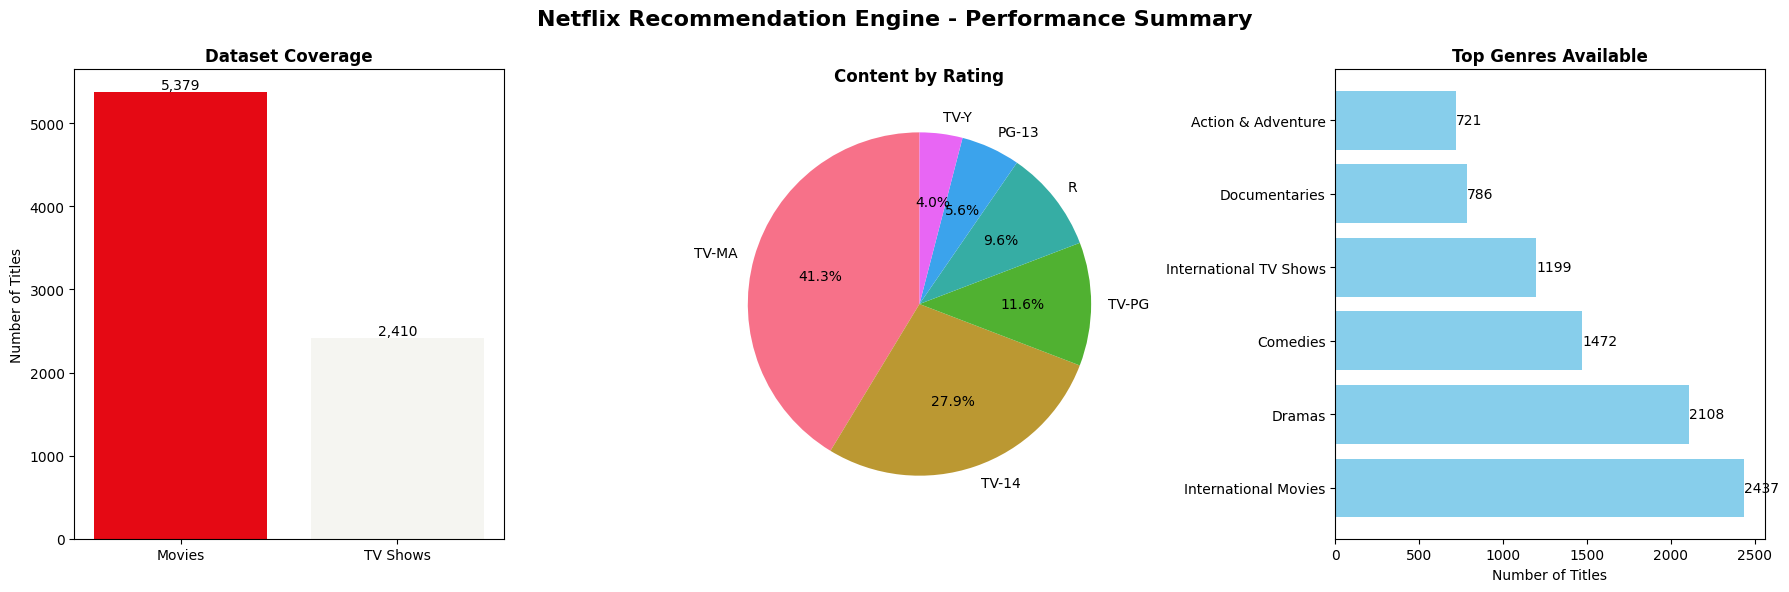


🎬 NETFLIX RECOMMENDATION ENGINE SUMMARY
📊 Dataset Size: 7,789 titles
🎭 Movies: 5,379
📺 TV Shows: 2,410
🌍 Countries: 118 different countries
🎪 Genres: 42 different genres

🔧 Engine Features:
✅ Content-based recommendations
✅ Text similarity matching
✅ Multi-feature analysis (genre, cast, director, description)
✅ Similarity scoring
✅ Easy search interface

💡 How to use:
📝 get_netflix_recommendations('title_name', num_recs=5)
🔍 recommender.search_titles('keyword')

🎯 Ready to discover great content on Netflix!


In [14]:
# Create a summary visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Netflix Recommendation Engine - Performance Summary', fontsize=16, fontweight='bold')

# 1. Dataset Coverage
coverage_data = {
    'Movies': len(netflix[netflix['Category'] == 'Movie']),
    'TV Shows': len(netflix[netflix['Category'] == 'TV Show']),
    'Total Titles': len(netflix)
}

bars1 = axes[0].bar(['Movies', 'TV Shows'], 
                   [coverage_data['Movies'], coverage_data['TV Shows']], 
                   color=['#E50914', '#F5F5F1'])
axes[0].set_title('Dataset Coverage', fontweight='bold')
axes[0].set_ylabel('Number of Titles')

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom')

# 2. Content Distribution by Rating
top_ratings = netflix['Rating'].value_counts().head(6)
axes[1].pie(top_ratings.values, labels=top_ratings.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Content by Rating', fontweight='bold')

# 3. Genre Diversity
genre_counts = pd.Series(all_genres).value_counts().head(6)
bars3 = axes[2].barh(range(len(genre_counts)), genre_counts.values, color='skyblue')
axes[2].set_yticks(range(len(genre_counts)))
axes[2].set_yticklabels(genre_counts.index)
axes[2].set_title('Top Genres Available', fontweight='bold')
axes[2].set_xlabel('Number of Titles')

# Add value labels
for i, bar in enumerate(bars3):
    width = bar.get_width()
    axes[2].text(width, bar.get_y() + bar.get_height()/2.,
                f'{int(width)}', ha='left', va='center')

plt.tight_layout()
plt.show()

# Print engine statistics
print("\n" + "="*60)
print("🎬 NETFLIX RECOMMENDATION ENGINE SUMMARY")
print("="*60)

print(f"📊 Dataset Size: {len(netflix):,} titles")
print(f"🎭 Movies: {len(netflix[netflix['Category'] == 'Movie']):,}")
print(f"📺 TV Shows: {len(netflix[netflix['Category'] == 'TV Show']):,}")
print(f"🌍 Countries: {len(set(all_countries))} different countries")
print(f"🎪 Genres: {len(set(all_genres))} different genres")

print("\n🔧 Engine Features:")
print("✅ Content-based recommendations")
print("✅ Text similarity matching")
print("✅ Multi-feature analysis (genre, cast, director, description)")
print("✅ Similarity scoring")
print("✅ Easy search interface")

print("\n💡 How to use:")
print("📝 get_netflix_recommendations('title_name', num_recs=5)")
print("🔍 recommender.search_titles('keyword')")

print("\n🎯 Ready to discover great content on Netflix!")
print("="*60)

In [15]:

import pickle
# Save the trained model to pickle file for Streamlit app
print("💾 Saving Netflix Recommendation Model...")

# Save the entire recommender object
with open('netflix_recommender.pkl', 'wb') as f:
    pickle.dump(recommender, f)

# Save the cleaned data separately 
with open('netflix_data.pkl', 'wb') as f:
    pickle.dump(netflix, f)

print("✅ Model saved successfully!")
print("📄 Files created:")
print("   • netflix_recommender.pkl - Complete trained model")
print("   • netflix_data.pkl - Processed Netflix dataset")
print("\n🚀 Ready to use in your Streamlit app!")

💾 Saving Netflix Recommendation Model...
✅ Model saved successfully!
📄 Files created:
   • netflix_recommender.pkl - Complete trained model
   • netflix_data.pkl - Processed Netflix dataset

🚀 Ready to use in your Streamlit app!
